# Unit Hypercube

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

To capture a fraction(r) of sample in a local neighbour, the expected edge length = $r^{1/p}$, where p = dimension

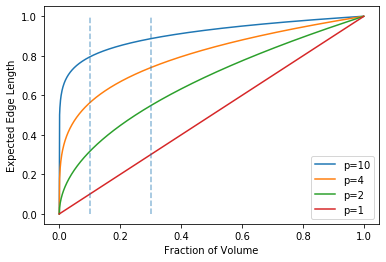

In [3]:
fraction = np.arange(0,1,0.001)
expected_edge_p1 = fraction**(1/1)
expected_edge_p2 = fraction**(1/2)
expected_edge_p4 = fraction**(1/4)
expected_edge_p10 = fraction**(1/10)

fig1 = plt.figure(1)
ax11 = fig1.add_subplot(1, 1, 1)
ax11.plot(fraction, expected_edge_p10, label='p=10')
ax11.plot(fraction, expected_edge_p4, label='p=4')
ax11.plot(fraction, expected_edge_p2, label='p=2')
ax11.plot(fraction, expected_edge_p1, label='p=1')
ax11.set_xlabel('Fraction of Volume')
ax11.set_ylabel('Expected Edge Length')
ax11.legend()
ax11.plot([.1, .1], [0, 1], '--', color='C0', alpha=.5)
ax11.plot([.3, .3], [0, 1], '--', color='C0', alpha=.5)
plt.show()

When p=10, to capture 10% volume of samples, we are expecting an edge length of around 0.8, which is no longer local.<br>
It also means that most data points are near the boundary of the space.

# Bias-Variance decomposition

MSE = Var + Bias^2

Let us construct another uniform example. Suppose

we have 1000 training examples $x_i$ generated uniformly on $[-1,1]^p$, and
the true relationship between $X$ and $Y$ is

$$
Y = f(X) = e^{-8\|X\|^2},
$$

without any measurement error.

In [12]:
def generate_data(p: int, n: int) ->np.ndarray:
    if p == 1:
        return np.array([random.uniform(-1, 1) for _ in range(n)])
    return np.array([
        [random.uniform(-1, 1) for _ in range(p)]
        for _ in range(n)
    ])

In [13]:
generate_data(1,5)

array([-0.3869051 ,  0.44736466, -0.03382154,  0.5025998 , -0.54067546])

In [14]:
def f(p: int, x: np.ndarray) ->float:
    if p == 1:
        return math.exp(-8*(x**2))
    return math.exp(-8*sum(xi*xi for xi in x))

Simulation: <br>
Grap the nearest neighbor X of 0 **(KNN1)** and calculate the distance <br>
Calculate y=f(x) and the variance and the squared bias for simulation of size 100.

In [16]:
def simulate(p: int, nsample:int, nsim: int) ->dict:
    res = {'average_distance': 0}
    sum_y = 0
    sum_y_square = 0
    for _ in range(nsim):
        data = generate_data(p, nsample)
        if p == 1:
            data_norm = np.abs(data)
        else:
            data_norm = np.linalg.norm(data, ord=2, axis=1)
        nearest_index = data_norm.argmin()
        nearest_x, nearest_distance = data[nearest_index], data_norm[nearest_index]
        nearest_y = f(p, nearest_x)
        sum_y += nearest_y
        sum_y_square += nearest_y*nearest_y
        res['average_distance'] += nearest_distance
    average_y = sum_y/nsim
    res['average_distance'] /= nsim
    res['variance'] = sum_y_square/nsim - average_y*average_y
    res['variance'] = 
    res['squared_bias'] = (1-average_y)*(1-average_y)
    return res

In [19]:
simulate(1, 1000, 100)

{'average_distance': 0.0010096500552278064,
 'variance': 6.092879534236317e-10,
 'squared_bias': 1.935411800499195e-10}

In [20]:
simulate(5, 1000, 100)

{'average_distance': 0.33668163171255955,
 'variance': 0.030120835262899354,
 'squared_bias': 0.3384478543042223}

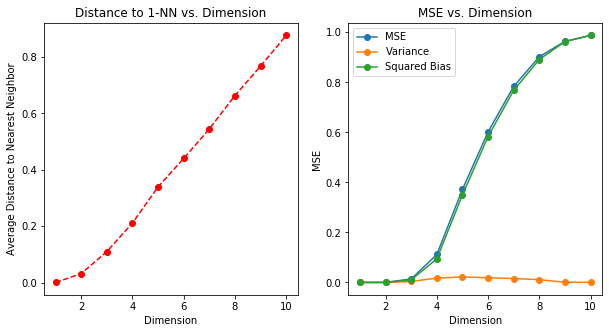

In [22]:
nsim = 100
data = {p: simulate(p, 1000, nsim) for p in range(1, 11)}
dimension = list(data.keys())
average_distance = [d['average_distance'] for p, d in data.items()]
variance = np.array([d['variance'] for p, d in data.items()])
squared_bias = np.array([d['squared_bias'] for p, d in data.items()])
mse = variance + squared_bias

fig2 = plt.figure(2, figsize=(10, 5))
ax21 = fig2.add_subplot(1, 2, 1)
ax21.set_title('Distance to 1-NN vs. Dimension')
ax21.plot(dimension, average_distance, 'ro--')
ax21.set_xlabel('Dimension')
ax21.set_ylabel('Average Distance to Nearest Neighbor')

ax22 = fig2.add_subplot(1, 2, 2)
ax22.set_title('MSE vs. Dimension')
ax22.plot(dimension, mse, 'o-', label='MSE')
ax22.plot(dimension, variance, 'o-', label='Variance')
ax22.plot(dimension, squared_bias, 'o-', label='Squared Bias')
ax22.set_xlabel('Dimension')
ax22.set_ylabel('MSE')
ax22.legend()
plt.show()

Squared Bias dominates here.

### When variance dominates:

In [55]:
def f(p: int, x: np.ndarray) ->float:
    if p==1: 
        return 0.5*((x+1)**3)
    return 0.5*((x[0]+1)**3)

In [63]:
f(1, 0.05)

0.5788125000000001

In [57]:
generate_data(1, 10)[3]

-0.15282489444509806

In [64]:
def simulate(p: int, nsample:int, nsim: int) ->dict:
    res = {'average_distance': 0}
    sum_y = 0
    sum_y_square = 0
    for _ in range(nsim):
        data = generate_data(p, nsample)
        if p == 1:
            data_norm = np.abs(data)
        else:
            data_norm = np.linalg.norm(data, ord=2, axis=1)
        nearest_index = data_norm.argmin()
        nearest_x, nearest_distance = data[nearest_index], data_norm[nearest_index]
#         print(nearest_x, nearest_distance)
        nearest_y = f(p, nearest_x)
        sum_y += nearest_y
        sum_y_square += nearest_y*nearest_y
        res['average_distance'] += nearest_distance
    average_y = sum_y/nsim
    res['average_distance'] /= nsim
    res['variance'] = sum_y_square/nsim - average_y*average_y
    res['squared_bias'] = (0.5-average_y)*(0.5-average_y)
    return res

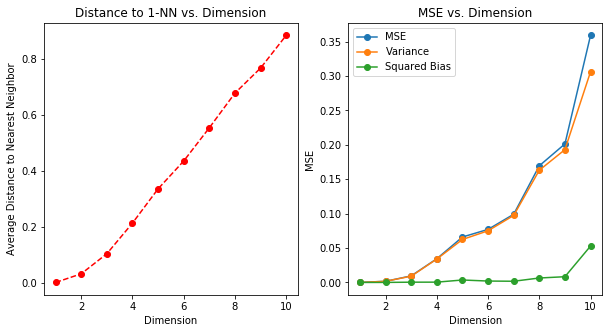

In [65]:
nsim = 100
data = {p: simulate(p, 1000, nsim) for p in range(1, 11)}
dimension = list(data.keys())
average_distance = [d['average_distance'] for p, d in data.items()]
variance = np.array([d['variance'] for p, d in data.items()])
squared_bias = np.array([d['squared_bias'] for p, d in data.items()])
mse = variance + squared_bias

fig3 = plt.figure(3, figsize=(10, 5))
ax21 = fig3.add_subplot(1, 2, 1)
ax21.set_title('Distance to 1-NN vs. Dimension')
ax21.plot(dimension, average_distance, 'ro--')
ax21.set_xlabel('Dimension')
ax21.set_ylabel('Average Distance to Nearest Neighbor')

ax22 = fig3.add_subplot(1, 2, 2)
ax22.set_title('MSE vs. Dimension')
ax22.plot(dimension, mse, 'o-', label='MSE')
ax22.plot(dimension, variance, 'o-', label='Variance')
ax22.plot(dimension, squared_bias, 'o-', label='Squared Bias')
ax22.set_xlabel('Dimension')
ax22.set_ylabel('MSE')
ax22.legend()
plt.show()